# Arrests in Sandtown-Winchester, Baltimore, MD

A lot has been written regarding the Sandtown-Winchester neighborhood in West Baltimore, the community where Freddie Gray lived and was arrested.  This is just a quick dive into crime data in his neighborhood to get a better picture of what life is like there. <br>

Data obtained from <a href='http://data.baltimorecity.gov'>Open Baltimore</a>.<br>

Created by Justin Elszasz, May 2, 2015

In [1]:
%pylab inline

import sys
import pandas as pd
import numpy
from datetime import datetime
import time_parser
import import_funcs
#reload(import_funcs)
BPD_arrests = import_funcs.import_BPDarrests()

Populating the interactive namespace from numpy and matplotlib


In [2]:
grouped = BPD_arrests.groupby('Neighborhood')
# sandtown named two different ways:
sandtown = ['Sandtown-Winchester','SANDTOWN-WINCHESTER']
sandtown_arrests = grouped.get_group(sandtown[0])
sandtown_arrests = sandtown_arrests.append(grouped.get_group(sandtown[1]))
sandtown_arrests.sort(ascending=True, inplace=True)

fedhill = ['Federal Hill','FEDERAL HILL']
fedhill_arrests = grouped.get_group(fedhill[0])
fedhill_arrests = fedhill_arrests.append(grouped.get_group(fedhill[1]))
fedhill_arrests.sort(ascending=True, inplace=True)

canton = ['Canton','CANTON']
canton_arrests = grouped.get_group(canton[0])
canton_arrests = canton_arrests.append(grouped.get_group(canton[1]))
canton_arrests.sort(ascending=True, inplace=True)

midtownbel = ['Mid-Town Belvedere','MID-TOWN BELVEDERE']
midtownbel_arrests = grouped.get_group(midtownbel[0])
midtownbel_arrests = midtownbel_arrests.append(grouped.get_group(midtownbel[1]))
midtownbel_arrests.sort(ascending=True, inplace=True)

print len(sandtown_arrests), len(fedhill_arrests), len(canton_arrests), len(midtownbel_arrests)

2140 247 254 184


# Total Monthly Arrests in Sandtown-Winchester

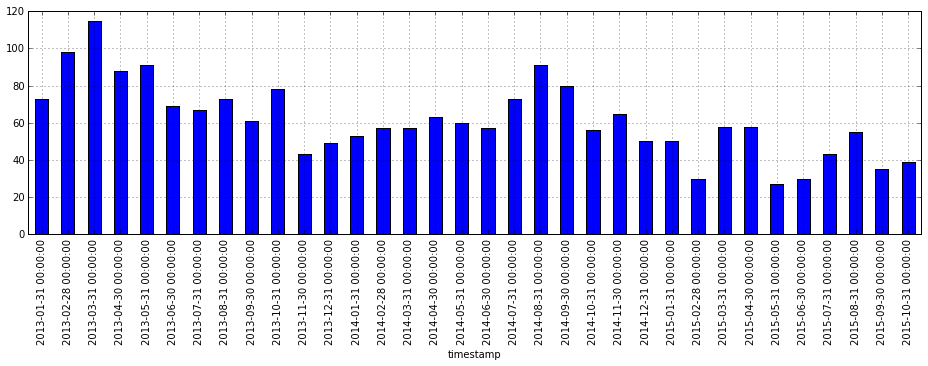

In [3]:
fig = plt.figure(figsize(16,4))

sandtown_arrests.Arrest.resample('m',how='count').plot(kind='bar')

plt.show()

v

In [4]:
print 'The average number of arrests in one week in Sandtown-Winchester is',round(sandtown_arrests.Arrest.resample('w',how='count').mean(),1)
print 'or about', round(sandtown_arrests.Arrest.resample('d',how='count').mean(),1),'per day.'

The average number of arrests in one week in Sandtown-Winchester is 14.1
or about 2.0 per day.


# Here are the top 20 arrest categories.

In [5]:
sandtown_arrest_type_counts = sandtown_arrests.groupby('ChargeDescription')['Arrest'].count()
sandtown_arrest_type_counts.sort(ascending=False, inplace=True)
sandtown_arrest_type_counts[:20]

ChargeDescription
Cds:Possess-Not Marihuana || Cds Violation       242
Cds:Possess-Not Marihuana || Cds                 132
Trespass-Posted Property || Trespassing           49
Cds: Poss Marihuana L/T 10 G || Cds Violation     48
Cds:Possess-Not Marihuana || Poss Heroin          45
Cds: Possession-Marihuana || Cds Violation        41
Cds:Possess-Not Marihuana || Cds Poss             41
Att-Cds Manuf/Dist-Narc || Cds Violation          39
Cds: Poss Marihuana L/T 10 G || Cds               37
Cds:Possess-Not Marihuana || Cds Possession       35
Asslt-Sec Degree || Common Assault                35
Cds:P W/I Dist:Narc || Cds                        31
Asslt-Sec Degree || Assault                       28
Gaming/Cards- Dice- Etc. || Gambling              28
Cds: Possession-Marihuana || Cds                  25
Cds Manuf/Dist-Narc || Cds Violation              24
Dis.Erly Conduct || Disorderly Conduct            23
Att-Cds Manuf/Dist-Narc || Cds                    21
Cds:P W/I Dist:Narc || Cds V

In [7]:
#sandtown_arrest_type_counts.iloc[list(pd.Series(sandtown_arrest_type_counts.index).str.contains('Marihuana'))].sum()


In [8]:
sandtown_arrest_type_counts.iloc[list(pd.Series(sandtown_arrest_type_counts.index).str.contains('Not Marihuana'))].sum()

709

In [9]:
sandtown_arrest_type_counts.iloc[list(pd.Series(sandtown_arrest_type_counts.index).str.contains('Deadly'))].sum()

15

In [25]:
sandtown_arrests['ChargeDescr1'] = sandtown_arrests.ChargeDescription.apply(lambda x: str(x).split('||')[0])
sandtown_arrests['ChargeDescr2'] = sandtown_arrests.ChargeDescription.apply(lambda x: str(x).split('||')[1] if len(str(x).split('||'))>1 else '')

canton_arrests['ChargeDescr1'] = canton_arrests.ChargeDescription.apply(lambda x: str(x).split('||')[0])
canton_arrests['ChargeDescr2'] = canton_arrests.ChargeDescription.apply(lambda x: str(x).split('||')[1] if len(str(x).split('||'))>1 else '')

fedhill_arrests['ChargeDescr1'] = fedhill_arrests.ChargeDescription.apply(lambda x: str(x).split('||')[0])
fedhill_arrests['ChargeDescr2'] = fedhill_arrests.ChargeDescription.apply(lambda x: str(x).split('||')[1] if len(str(x).split('||'))>1 else '')

In [26]:
print len(sandtown_arrests['ChargeDescr1'].unique()), len(sandtown_arrests['ChargeDescr2'].unique())

117 360


In [10]:
st_gb_ChargeDescr1 = sandtown_arrests.groupby(sandtown_arrests['ChargeDescr1'])
st_ChargeDescr1_counts = st_gb_ChargeDescr1['Arrest'].count()
st_ChargeDescr1_counts.sort(ascending=False, inplace=True)
print st_ChargeDescr1_counts[:25]

KeyError: 'ChargeDescr1'

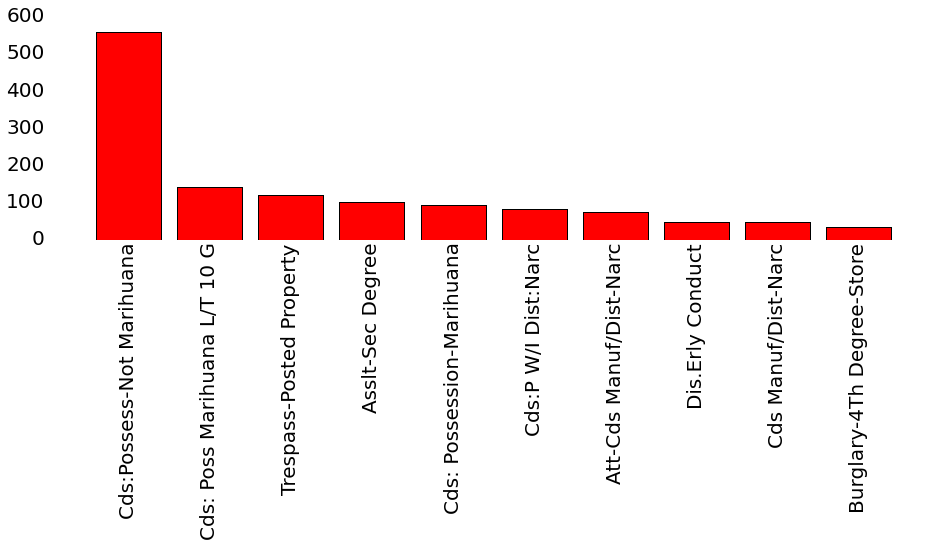

In [33]:
fig = plt.figure()
ax1 = plt.subplot(1,1,1)
bar(range(0,10,1),st_ChargeDescr1_counts[:10],align='center',color='r')
xticks(range(0,10,1))
ax1.set_xticklabels(st_ChargeDescr1_counts[:10].index,rotation=90)
xlim([-1,10])
# turn off square border around plot
ax1.spines["top"].set_visible(False)  
ax1.spines["bottom"].set_visible(False)  
ax1.spines["right"].set_visible(False)  
ax1.spines["left"].set_visible(False)

# turn off ticks
ax1.tick_params(axis="both", which="both", bottom="off", top="off",
               labelbottom="on", left="off", right="off", labelleft="on",labelsize=20)

plt.show()

In [34]:
st_ChargeDescr1_counts = pd.DataFrame(st_ChargeDescr1_counts)
st_ChargeDescr1_counts['ChargeDescr1'] = st_ChargeDescr1_counts.index
st_cds_counts = st_ChargeDescr1_counts[st_ChargeDescr1_counts['ChargeDescr1'].str.contains('Cds')==True]

This is the percent of all arrests in Sandtown-Winchester attributable to controlled and dangerous substances.

In [35]:
round(100*float(st_cds_counts.Arrest.sum())/float(st_ChargeDescr1_counts.Arrest.sum()),1)

64.4

This is the percent of all arrests in Sandtown-Winchester attributable to marihuana.

In [36]:
round(100*(st_ChargeDescr1_counts[st_ChargeDescr1_counts['ChargeDescr1']=='Cds: Possession-Marihuana '].Arrest.sum() + st_ChargeDescr1_counts[st_ChargeDescr1_counts['ChargeDescr1']=='Cds: Poss Marihuana L/T 10 G '].Arrest.sum())/float(st_ChargeDescr1_counts.Arrest.sum()),1)

13.9

# A Day in Sandtown-Westchester

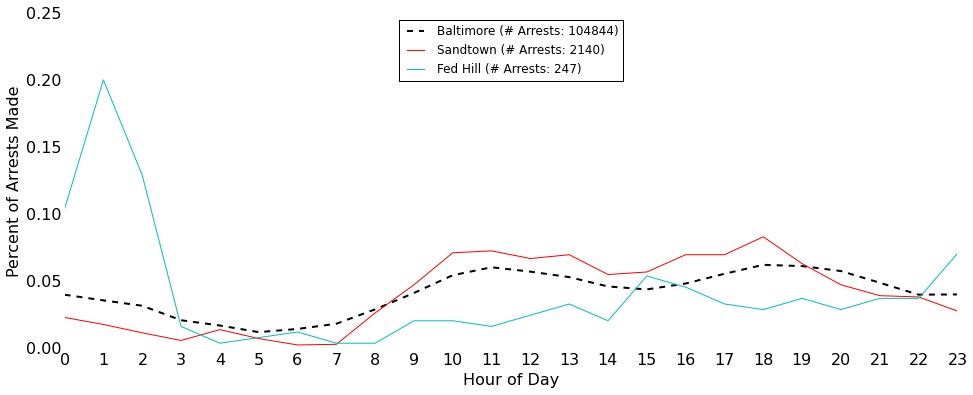

In [11]:
fig = plt.figure(figsize=[16,6])
ax1 = plt.subplot(1,1,1)
plot_Bal = plot(BPD_arrests['Arrest'].groupby(BPD_arrests.index.hour).count().apply(lambda x: float(x)) / float(BPD_arrests['Arrest'].count()),
                color = 'k',
                linestyle='--',
                linewidth=2.0)
plot_ST = plot(sandtown_arrests['Arrest'].groupby(sandtown_arrests.index.hour).count().index,sandtown_arrests['Arrest'].groupby(sandtown_arrests.index.hour).count().apply(lambda x: float(x)) / float(sandtown_arrests['Arrest'].count()),
                color='r')
plot_FH = plot(fedhill_arrests['Arrest'].groupby(fedhill_arrests.index.hour).count().apply(lambda x: float(x)) / float(fedhill_arrests['Arrest'].count()),
               color='c')
#(canton_arrests['Arrest'].groupby(canton_arrests.index.hour).count().apply(lambda x: float(x)) / float(canton_arrests['Arrest'].count())).plot()
#(midtownbel_arrests['Arrest'].groupby(midtownbel_arrests.index.hour).count().apply(lambda x: float(x)) / float(midtownbel_arrests['Arrest'].count())).plot()
grid('off')
legend(['Baltimore (# Arrests: %s)'%len(BPD_arrests['Arrest']),
        'Sandtown (# Arrests: %s)'%len(sandtown_arrests['Arrest']),
        'Fed Hill (# Arrests: %s)'%len(fedhill_arrests['Arrest'])],
       loc='upper center')#,
#        'Canton (# Arrests: %s)'%len(canton_arrests['Arrest']),
#       'Midtown Belvedere (N=%s)'%len(midtownbel_arrests['Arrest'])],loc='upper center')

xticks(range(0,24,1))
xlim([0,23])
#ylim([0,.1])
ylabel('Percent of Arrests Made',fontsize=16)
xlabel('Hour of Day',fontsize=16)

# turn off square border around plot
ax1.spines["top"].set_visible(False)  
ax1.spines["bottom"].set_visible(False)  
ax1.spines["right"].set_visible(False)  
ax1.spines["left"].set_visible(False)

# turn off ticks
ax1.tick_params(axis="both", which="both", bottom="off", top="off",
               labelbottom="on", left="off", right="off", labelleft="on",labelsize=16)
plt.show()

In [38]:
for i, j in BPD_arrests.groupby('Neighborhood'):
    print i

ABELL
ALLENDALE
ARCADIA
ARLINGTON
ARMISTEAD GARDENS
ASHBURTON
Abell
Allendale
Arcadia
Arlington
Armistead Gardens
Ashburton
BALTIMORE HIGHLANDS
BARCLAY
BARRE CIRCLE
BAYVIEW
BEECHFIELD
BELAIR-EDISON
BELAIR-PARKSIDE
BELVEDERE
BEREA
BETTER WAVERLY
BEVERLY HILLS
BIDDLE STREET
BOLTON HILL
BOYD-BOOTH
BREWERS HILL
BRIDGEVIEW/GREENLAWN
BROADWAY EAST
BROENING MANOR
BROOKLYN
BURLEITH-LEIGHTON
BUTCHER'S HILL
Baltimore Highlands
Barclay
Barre Circle
Bayview
Beechfield
Belair-Edison
Belair-Parkside
Belvedere
Berea
Better Waverly
Beverly Hills
Biddle Street
Bolton Hill
Boyd-Booth
Brewers Hill
Bridgeview/Greenlawn
Broadway East
Broening Manor
Brooklyn
Burleith-Leighton
Butcher's Hill
CALLAWAY-GARRISON
CAMERON VILLAGE
CANTON
CANTON INDUSTRIAL AREA
CARE
CARROLL - CAMDEN INDUSTRIAL AREA
CARROLL PARK
CARROLL-SOUTH HILTON
CARROLLTON RIDGE
CEDARCROFT
CEDMONT
CEDONIA
CENTRAL FOREST PARK
CENTRAL PARK HEIGHTS
CHARLES NORTH
CHARLES VILLAGE
CHERRY HILL
CHESWOLDE
CHINQUAPIN PARK
CLIFTON PARK
COLDSPRING
COLDSTREA

In [39]:
canton_pop = 4089+4011
sandtown_pop = 8086+6810
midtownbel_pop = 7715+7305
baltimore_pop = 328712+292249

In [40]:
float(len(sandtown_arrests['Arrest']))/float(sandtown_pop)

0.11499731471535983

In [41]:
float(len(midtownbel_arrests['Arrest']))/float(midtownbel_pop)

0.010319573901464714

In [42]:
float(len(BPD_arrests['Arrest']))/float(baltimore_pop)

0.13408410512093352

In [43]:
sandtown_10am = sandtown_arrests.groupby(sandtown_arrests.index.hour).get_group(10)
sandtown_10am_gb = sandtown_10am.groupby('ChargeDescr1')
a = sandtown_10am_gb['Arrest'].count()
a.sort(ascending=False, inplace=True)
a

ChargeDescr1
Cds:Possess-Not Marihuana          64
Trespass-Posted Property           12
Cds: Poss Marihuana L/T 10 G        9
Cds Manuf/Dist-Narc                 7
Att-Cds Manuf/Dist-Narc             5
Cds:P W/I Dist:Narc                 4
Burglary-4Th Degree-Store           3
Asslt-Sec Degree                    3
Cds: Possession-Marihuana           2
False Statement To Officer          2
Fail Obey Renble/Lawfl              2
Cds Possess - Lg Amt                2
Theft: Less $1,000 Value            2
Cds:Poss Para                       2
Att-Cds Manuf/Dist.                 1
Att-Theft Less Than $100.00         1
Burglary-Fourth Degree              1
Att-Burglary-Fourth Degree          1
Deadly Weapon-Conceal               1
Animal Cruelty                      1
Trespass: Private Property          1
Dis.Erly Conduct                    1
Driving Rental Veh Viol Of Agr      1
Dui                                 1
Handgun On Person                   1
Mal Dest Prop/Valu - $500           1

In [44]:
canton_10am = canton_arrests.groupby(canton_arrests.index.hour).get_group(10)
canton_10am_gb = canton_10am.groupby('ChargeDescr1')
a = canton_10am_gb['Arrest'].count()
a.sort(ascending=False, inplace=True)
a

ChargeDescr1
Att-Burglary-Fourth Degree     2
Mal Dest Prop/Valu - $500      1
Indecent Exposure              1
Cds:Possess-Not Marihuana      1
Name: Arrest, dtype: int64

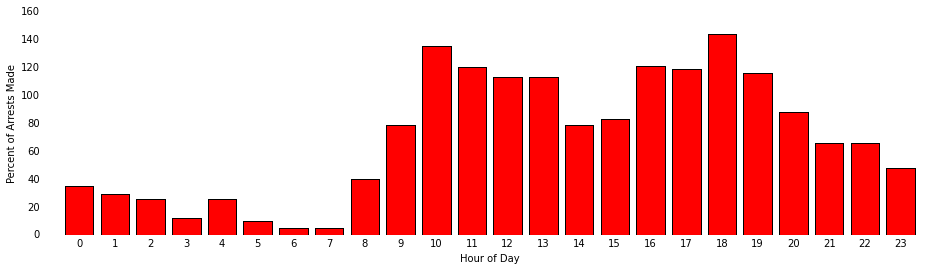

In [45]:
fig = plt.figure(figsize=[16,4])
ax1 = plt.subplot(1,1,1)
#plot_Bal = plot(BPD_arrests['Arrest'].groupby(BPD_arrests.index.hour).count().apply(lambda x: float(x)) / float(BPD_arrests['Arrest'].count()),
#                color = 'k')
plot_ST = bar(sandtown_arrests['Arrest'].groupby(sandtown_arrests.index.hour).count().index,sandtown_arrests['Arrest'].groupby(sandtown_arrests.index.hour).count(),
               color='r',
               align='center')
#(fedhill_arrests['Arrest'].groupby(fedhill_arrests.index.hour).count().apply(lambda x: float(x)) / float(fedhill_arrests['Arrest'].count())).plot()
#(canton_arrests['Arrest'].groupby(canton_arrests.index.hour).count().apply(lambda x: float(x)) / float(canton_arrests['Arrest'].count())).plot()
#(midtownbel_arrests['Arrest'].groupby(midtownbel_arrests.index.hour).count().apply(lambda x: float(x)) / float(midtownbel_arrests['Arrest'].count())).plot()

grid('off')

#legend(['Baltimore (# Arrests: %s)'%len(BPD_arrests['Arrest']),
#        'Sandtown (# Arrests: %s)'%len(sandtown_arrests['Arrest']),
#        'Fed Hill (# Arrests: %s)'%len(fedhill_arrests['Arrest']),
#        'Canton (# Arrests: %s)'%len(canton_arrests['Arrest']),
#        'Midtown Belvedere (N=%s)'%len(midtownbel_arrests['Arrest'])],loc='upper center')

xticks(range(0,24,1))
xlim([-1,24])
#ylim([0,.1])

# turn off square border around plot
ax1.spines["top"].set_visible(False)  
ax1.spines["bottom"].set_visible(False)  
ax1.spines["right"].set_visible(False)  
ax1.spines["left"].set_visible(False)

# turn off ticks
ax1.tick_params(axis="both", which="both", bottom="off", top="off",
               labelbottom="on", left="off", right="off", labelleft="on",labelsize=10)

ylabel('Percent of Arrests Made')
xlabel('Hour of Day')
plt.show()

In [48]:
BPD_arrests.head()

,Arrest,Age,Sex,Race,ArrestLocation,IncidentOffense,IncidentLocation,Charge,ChargeDescription,District,Post,Neighborhood,Location 1
timestamp,,,,,,,,,,,,,
2014-12-13 22:30:00,14207911,56,M,B,500 W FAYETTE ST,Unknown Offense,NaN,NaN,Unknown Charge,Central,121,DOWNTOWN,"(39.2903683802, -76.6224520970)"
2014-12-13 19:30:00,14207904,28,M,B,4400 PARK HEIGHTS AVE,55-Disorderly Person,4400 Park Heights Av,2 2220,Trespass: Private Property || Disorderly Conduct,Northwestern,612,CENTRAL PARK HEIGHTS,"(39.3400042754, -76.6667641653)"
2014-12-13 01:08:00,14207733,35,F,W,4000 GRANITE AVE,Unknown Offense,5800 Belair Rd,4 3550,Cds:Possess-Not Marihuana || Cds Violation,Northeastern,427,GLENHAM-BELHAR,"(39.3457137397, -76.5427717433)"
2014-12-13 12:00:00,14207785,39,M,B,400 W LEE ST,Unknown Offense,400 W Lee St,1 2545,Counterfeit Tm/Under $1000 || Failure To Obey,Southern,941,STADIUM AREA,"(39.2818088652, -76.6212436885)"
2014-12-13 02:45:00,14207728,56,M,B,3600 HARFORD RD,Unknown Offense,NaN,NaN,Driving On Susp. Lic.,Northeastern,414,MAYFIELD,"(39.3304415117, -76.5809727583)"
